# This notebook generates leaf population distributions

The distribution of leaf populations over the course of the growing season effects how leaf populations overlap and how many leaf populations we need.



In [213]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import *

In [214]:
td = np.arange(100)
t_l = 10


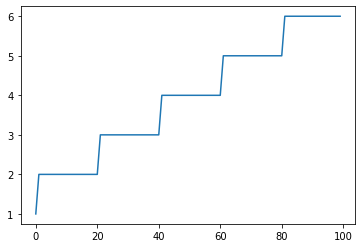

In [215]:
a = 0.050
emerged_leaf_count = np.ceil(td * a) + 1
plt.plot(emerged_leaf_count)

In [216]:
leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), td) if i > 2 and c > emerged_leaf_count[i-1]])
nP = len(leaf_population_t_emerg)
leaf_population_t_emerg

array([21, 41, 61, 81])

In [217]:

t_lem = t_l * 0.53
leaf_population_t_lems = [t_lem for _ in range(nP)]
leaf_population_t_lems

[5.300000000000001, 5.300000000000001, 5.300000000000001, 5.300000000000001]

In [218]:
from typing import List
def get_growing_populations(nP: int, td, leaf_population_t_emerg: List[float], leaf_population_t_lems: List[float]) -> List[bool]:
    """Calculate which leaf populations are still growing"""
    growing_populations = [False for _ in range(nP)]
    for iP in range(nP):    
        t_emerg = leaf_population_t_emerg[iP]
        t_lem = leaf_population_t_lems[iP]
        growing_populations[iP] = t_emerg < td <= t_emerg + t_lem
    return growing_populations
        

21 5.300000000000001
41 5.300000000000001
61 5.300000000000001
81 5.300000000000001


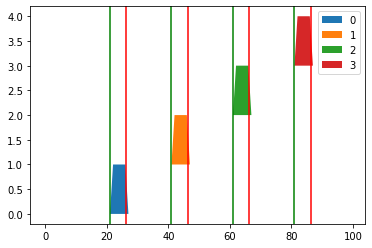

In [219]:
td_daily = td
x = td_daily
a = 0
growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
for i, iP in enumerate(range(nP)):
    b = np.array([g[iP] for g in growing_populations_all])
    plt.fill_between(x, i, i + b, label=iP)
    plt.legend()
    
    
for iP in range(nP):
    plt.axvline(leaf_population_t_emerg[iP], c="green")
    plt.axvline(leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], c="red")
    print(leaf_population_t_emerg[iP],leaf_population_t_lems[iP])


In [220]:
from _utils import interact_plus_reset
import ipywidgets as widgets

In [221]:
def vert_line(ax, x, ylim, **kwargs):
    ax.plot([x,x], ylim, **kwargs)

# Methods for defining rate of leaf emergence
The below methods define the rate at which successive leaf populations emerge(Green vertical line). They also show the period of emergence(t_lem) for each leaf population(Horizontal bars between green vertical line and orange vertical line) and the end of the leaf population lifespan(t_l) (Red vertical line).


# Method 1 - Specify Growth Rate
The first method specifies a growth rate that defines the rate of leaf emergence as a function of the thermal time and a growth rate parameter.

In [222]:
@interact_plus_reset(
  t_l = widgets.FloatSlider(min=1, max=90, value=35, step=0.1), 
  growth_rate = widgets.FloatSlider(min=0.001, max=0.1, value=0.05, step=0.0001), 
)
def get_t_l(
    t_l,
    growth_rate,
):
    fig, pltx = plt.subplots()
    td_daily = np.arange(100)
    emerged_leaf_count = np.ceil(td_daily * growth_rate) + 1
    pltx.plot(emerged_leaf_count)

    leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), td) if c > emerged_leaf_count[i-1] or i == 1])
    nP = len(leaf_population_t_emerg)

    t_lem = t_l * 0.53
    leaf_population_t_lems = [t_lem for _ in range(nP)]

    growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
    for iP in range(nP):
        b = np.array([g[iP] for g in growing_populations_all])
        pltx.fill_between(x, iP+0.2, iP+0.2 + (b*0.3), label=iP)
        pltx.legend()
        
        
    for iP in range(nP):
        vert_line(pltx, leaf_population_t_emerg[iP], [iP-0.2, iP+1.2], c="green")
        vert_line(pltx, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP-0.2, iP+1.2], c="orange")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_l, [iP-0.2, iP+1.2], c="red")

print("Blue line is number of emerged leaf populations")
print("Green vertical lines are start of leaf emergence")
print("Orange vertical lines are end of leaf emergence")
print("Red vertical lines are end of leaf lifespan")


Button(description='Reset', style=ButtonStyle())

Output()

Blue line is number of emerged leaf populations
Green vertical lines are start of leaf emergence
Orange vertical lines are end of leaf emergence
Red vertical lines are end of leaf lifespan


# Method 2 - Specify Number of Populations
The second method specifies a set number of populations. We then set the growth rate to distribute these over the growing season

In [1]:
@interact_plus_reset(
  t_l = widgets.FloatSlider(min=1, max=90, value=35, step=0.1), 
#   growth_rate = widgets.FloatSlider(min=0.001, max=0.1, value=0.05, step=0.0001), 
  nP = widgets.IntSlider(min=1, max=10), 
)
def get_t_l(
    t_l,
    # growth_rate,
    nP,
):
    fig, pltx = plt.subplots()
    td_daily = np.arange(100)

    growth_rate = nP / (td_daily[-1] - td_daily[0])
    emerged_leaf_count = np.ceil(td_daily * growth_rate) + 1
    pltx.plot(emerged_leaf_count)

    leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), td) if c > emerged_leaf_count[i-1] or i == 1])
    nP = len(leaf_population_t_emerg)

    t_lem = t_l * 0.53
    leaf_population_t_lems = [t_lem for _ in range(nP)]

    growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
    for iP in range(nP):
        b = np.array([g[iP] for g in growing_populations_all])
        pltx.fill_between(x, iP+0.2, iP+0.2 + (b*0.3), label=iP)
        pltx.legend()
        
        
    for iP in range(nP):
        vert_line(pltx, leaf_population_t_emerg[iP], [iP-0.2, iP+1.2], c="green")
        vert_line(pltx, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP-0.2, iP+1.2], c="orange")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_l, [iP-0.2, iP+1.2], c="red")

print("Blue line is number of emerged leaf populations")
print("Green vertical lines are start of leaf emergence")
print("Orange vertical lines are end of leaf emergence")
print("Red vertical lines are end of leaf lifespan")


NameError: name 'interact_plus_reset' is not defined

# Method 3 - Specify the length of a leaf life span
The third method specifies the lifespan of each leaf population and fits them with no overlap

In [224]:
@interact_plus_reset(
  t_l = widgets.FloatSlider(min=1, max=90, value=35, step=0.1), 
  nP = widgets.IntSlider(min=1, max=10), 
)
def get_t_l(
    t_l,
    nP,
):
    fig, pltx = plt.subplots()
    td_daily = np.arange(100)

    t_lem = t_l * 0.53
    growth_rate = 1 / t_l
    emerged_leaf_count = np.ceil(td_daily * growth_rate) + 1
    pltx.plot(emerged_leaf_count)

    leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), td) if c > emerged_leaf_count[i-1] or i == 1])
    nP = len(leaf_population_t_emerg)

    leaf_population_t_lems = [t_lem for _ in range(nP)]

    growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
    for iP in range(nP):
        b = np.array([g[iP] for g in growing_populations_all])
        pltx.fill_between(x, iP+0.2, iP+0.2 + (b*0.3), label=iP)
        pltx.legend()
        
        
    for iP in range(nP):
        vert_line(pltx, leaf_population_t_emerg[iP], [iP-0.2, iP+1.2], c="green")
        vert_line(pltx, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP-0.2, iP+1.2], c="orange")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_l, [iP-0.2, iP+1.2], c="red")

print("Blue line is number of emerged leaf populations")
print("Green vertical lines are start of leaf emergence")
print("Orange vertical lines are end of leaf emergence")
print("Red vertical lines are end of leaf lifespan")


Button(description='Reset', style=ButtonStyle())

Output()

Blue line is number of emerged leaf populations
Green vertical lines are start of leaf emergence
Orange vertical lines are end of leaf emergence
Red vertical lines are end of leaf lifespan


# Method 4 - Specify the length of a leaf life span and fit them together so that t_lma overlaps
The third method specifies the lifespan of each leaf population and fits them so that only 1 leaf population is emerging at a time(I.e no t_lem periods overlap)

In [225]:
@interact_plus_reset(
  t_l = widgets.FloatSlider(min=1, max=90, value=35, step=0.1), 
)
def get_t_l(
    t_l,
):
    fig, pltx = plt.subplots()
    td_daily = np.arange(100)

    t_lem = t_l * 0.53
    growth_rate = 1 / t_lem

    emerged_leaf_count = np.ceil(td_daily * growth_rate) + 1
    pltx.plot(emerged_leaf_count)

    leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), td) if c > emerged_leaf_count[i-1] or i == 1])
    nP = len(leaf_population_t_emerg)

    leaf_population_t_lems = [t_lem for _ in range(nP)]

    growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
    for iP in range(nP):
        b = np.array([g[iP] for g in growing_populations_all])
        pltx.fill_between(x, iP+0.2, iP+0.2 + (b*0.3), label=iP)
        pltx.legend()
        
        
    for iP in range(nP):
        vert_line(pltx, leaf_population_t_emerg[iP], [iP-0.2, iP+1.2], c="green")
        vert_line(pltx, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP-0.2, iP+1.2], c="orange")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_l, [iP-0.2, iP+1.2], c="red")

print("Blue line is number of emerged leaf populations")
print("Green vertical lines are start of leaf emergence")
print("Orange vertical lines are end of leaf emergence")
print("Red vertical lines are end of leaf lifespan")


Button(description='Reset', style=ButtonStyle())

Output()

Blue line is number of emerged leaf populations
Green vertical lines are start of leaf emergence
Orange vertical lines are end of leaf emergence
Red vertical lines are end of leaf lifespan


# Method 5 - Specifiy the number of populations and t_l and fit so that all populations fit in growing season
This method fits the populations with even spacing so that the first population emerges at sgs and the last population ends at EGS

In [226]:
@interact_plus_reset(
  t_l = widgets.FloatSlider(min=1, max=90, value=35, step=0.1), 
  nP = widgets.IntSlider(min=1, max=10), 
)
def get_t_l(
    t_l,
    nP,
):
    fig, pltx = plt.subplots()
    td_daily = np.arange(100)

    t_lem = t_l * 0.53

    last_t_emerg = td[-1] - t_l
    first_t_emerg = 0

    growth_rate = (nP-1) / (last_t_emerg - first_t_emerg)

    emerged_leaf_count = np.ceil(td_daily * growth_rate) + 1
    pltx.plot(emerged_leaf_count)


    leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), td) if c > emerged_leaf_count[i-1] or i == 1])

    leaf_population_t_lems = [t_lem for _ in range(nP)]

    growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
    for iP in range(nP):
        b = np.array([g[iP] for g in growing_populations_all])
        pltx.fill_between(x, iP+0.2, iP+0.2 + (b*0.3), label=iP)
        pltx.legend()
        
        
    for iP in range(nP):
        vert_line(pltx, leaf_population_t_emerg[iP], [iP-0.2, iP+1.2], c="green")
        vert_line(pltx, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP-0.2, iP+1.2], c="orange")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_l, [iP-0.2, iP+1.2], c="red")

print("Blue line is number of emerged leaf populations")
print("Green vertical lines are start of leaf emergence")
print("Orange vertical lines are end of leaf emergence")
print("Red vertical lines are end of leaf lifespan")

Button(description='Reset', style=ButtonStyle())

Output()

Blue line is number of emerged leaf populations
Green vertical lines are start of leaf emergence
Orange vertical lines are end of leaf emergence
Red vertical lines are end of leaf lifespan


In [227]:

@interact_plus_reset(
  t_l = widgets.FloatSlider(min=1, max=90, value=50, step=0.1), 
  nP = widgets.IntSlider(min=1, max=10, value=4), 
)
def get_t_l(
    t_l,
    nP,
):
    fig, pltx = plt.subplots()
    pltx.clear()
    td_daily = np.arange(100)

    t_l_flag = t_l

    t_lem = t_l * 0.53
    t_lem_flag = t_l_flag * 0.53
    t_lep = t_lem + t_l * 0.31
    t_lep_flag = t_lem_flag + t_l_flag * 0.31

    last_t_emerg = td[-1] - t_l_flag
    first_t_emerg = 0

    growth_rate = (nP-1) / (last_t_emerg - first_t_emerg)

    emerged_leaf_count = np.ceil(td_daily * growth_rate) + 1
    pltx.plot(emerged_leaf_count)


    leaf_population_t_emerg = np.array([dd for (i, c), dd in zip(enumerate(emerged_leaf_count), td) if c > emerged_leaf_count[i-1] or i == 1])

    leaf_population_t_lems = [t_lem for _ in range(nP-1)] + [t_l_flag * 0.53]

    growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
    for iP in range(nP):
        b = np.array([g[iP] for g in growing_populations_all])
        pltx.fill_between(x, iP+0.2, iP+0.2 + (b*0.3), label=iP)
        pltx.legend()
        
        
    for iP in range(nP-1):
        vert_line(pltx, leaf_population_t_emerg[iP], [iP-0.2, iP+1.2], c="green")
        vert_line(pltx, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP-0.2, iP+1.2], c="orange")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_lep, [iP-0.2, iP+1.2], c="blue")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_l, [iP-0.2, iP+1.2], c="red")

    vert_line(pltx, leaf_population_t_emerg[nP-1], [nP-1-0.2, nP-1+1.2], c="green")
    vert_line(pltx, leaf_population_t_emerg[nP-1] + leaf_population_t_lems[nP-1], [nP-1-0.2, nP-1+1.2], c="orange")
    vert_line(pltx, leaf_population_t_emerg[nP-1] + t_lep_flag, [nP-1-0.2, nP-1+1.2], c="blue")
    vert_line(pltx, leaf_population_t_emerg[nP-1] + t_l_flag, [nP-1-0.2, nP-1+1.2], c="red")

print("Blue line is number of emerged leaf populations")
print("Green vertical lines are start of leaf emergence")
print("Orange vertical lines are end of leaf emergence")
print("Blue vertical lines are start of leaf senesence")
print("Red vertical lines are end of leaf lifespan")

Button(description='Reset', style=ButtonStyle())

Output()

Blue line is number of emerged leaf populations
Green vertical lines are start of leaf emergence
Orange vertical lines are end of leaf emergence
Blue vertical lines are start of leaf senesence
Red vertical lines are end of leaf lifespan


# Method 6 - Specifiy the number of populations and t_l and fit so that all populations fit in growing season (With Flag leaf)
This method fits the populations with even spacing so that the first population emerges at sgs and the last population ends at EGS. Sets the last population to length of flag leaf

In [244]:
f_phen_d = td[-1]
@interact_plus_reset(
  t_l = widgets.FloatSlider(min=1, max=90, value=50, step=0.1), 
  t_l_flag = widgets.FloatSlider(min=1, max=90, value=70, step=0.1), 
  nP = widgets.IntSlider(min=1, max=10, value=4), 
)
def get_t_l(
    t_l,
    t_l_flag,
    nP,
):
    fig, pltx = plt.subplots()
    pltx.clear()
    td_daily = np.arange(100)

    
    t_lem = t_l * 0.53
    t_lem_flag = t_l_flag * 0.53
    t_lep = t_lem + t_l * 0.31
    t_lep_flag = t_lem_flag + t_l_flag * 0.31

    last_t_emerg = f_phen_d - t_l_flag # emergence of flag leaf
    first_t_emerg = 0

    growth_rate = (nP-1) / (last_t_emerg - first_t_emerg)

    emerged_leaf_count = np.ceil(td_daily * growth_rate)
    pltx.plot(emerged_leaf_count)

    leaf_population_t_emerg = np.array([t for (i, c), t in zip(enumerate(emerged_leaf_count), td) if c >= 1 and c > emerged_leaf_count[i-1] and c < nP] + [last_t_emerg])

    leaf_population_t_lems = [t_lem for _ in range(nP-1)] + [t_l_flag * 0.53]

    growing_populations_all = [get_growing_populations(nP, td, leaf_population_t_emerg, leaf_population_t_lems) for td in td_daily]
    for iP in range(nP):
        b = np.array([g[iP] for g in growing_populations_all])
        pltx.fill_between(x, iP+0.2, iP+0.2 + (b*0.3), label=iP)
        pltx.legend()
        
        
    for iP in range(nP-1):
        vert_line(pltx, leaf_population_t_emerg[iP], [iP-0.2, iP+1.2], c="green")
        vert_line(pltx, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP-0.2, iP+1.2], c="orange")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_lep, [iP-0.2, iP+1.2], c="blue")
        vert_line(pltx, leaf_population_t_emerg[iP] + t_l, [iP-0.2, iP+1.2], c="red")

    vert_line(pltx, leaf_population_t_emerg[nP-1], [nP-1-0.2, nP-1+1.2], c="green")
    vert_line(pltx, leaf_population_t_emerg[nP-1] + leaf_population_t_lems[nP-1], [nP-1-0.2, nP-1+1.2], c="orange")
    vert_line(pltx, leaf_population_t_emerg[nP-1] + t_lep_flag, [nP-1-0.2, nP-1+1.2], c="blue")
    vert_line(pltx, leaf_population_t_emerg[nP-1] + t_l_flag, [nP-1-0.2, nP-1+1.2], c="red")

print("Blue line is number of emerged leaf populations")
print("Green vertical lines are start of leaf emergence")
print("Orange vertical lines are end of leaf emergence")
print("Blue vertical lines are start of leaf senesence")
print("Red vertical lines are end of leaf lifespan")

Button(description='Reset', style=ButtonStyle())

Output()

Blue line is number of emerged leaf populations
Green vertical lines are start of leaf emergence
Orange vertical lines are end of leaf emergence
Blue vertical lines are start of leaf senesence
Red vertical lines are end of leaf lifespan


# As a function of DVI
We need to be able to define each value at the hourly simulation rather than calculating knowing later data.

- SGS/sowing day at DVI = -1
- EGS = DVI = 2
- growing_season = EGS - SGS
- Astart = 0.55 * growing_season = 0.65dvi


In [229]:
# Assume that f_phen_d = dvi=-1 -> dvi=2
 # therefore tt_emr = f_phen_a

Astart = 0.55 * (2 - -1) + -1
Astart  # = 0.65 Therefore Astart at dvi = 0.65
# Flag leaf fully developed at dvi = 0.65
# Flag leaf t_lma = 2 - Astart = 1.35
# All leaf emergence between dvi=0 and dvi=0.65

0.6500000000000001

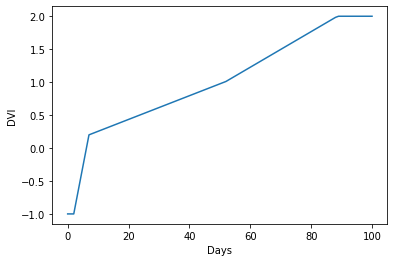

In [230]:
# Calculate DVI
from do3se_phenology.phyllochron_dvi import calc_dvi
row_count = len(td)
dd_full = np.arange(row_count)
hr_full = np.zeros(row_count)
dvi = [-1]
rpe = np.ones(row_count)
teff = np.ones(row_count) * 18
tt_emr, tt_veg, tt_rep = [75, 1000, 666]
sowing_day = 1
for t, rp, d, hr in zip(teff, rpe, dd_full, hr_full):
  if hr == 0:
    new_dvi = calc_dvi(dvi[-1],t, tt_emr, tt_veg, tt_rep, rp,d, sowing_day)
    dvi.append(new_dvi)
dvi = np.array(dvi)
# plt.xlim(sowing_day - 5, sowing_day+120)
plt.plot(dvi)
plt.xlabel("Days")
plt.ylabel("DVI")
plt.show()



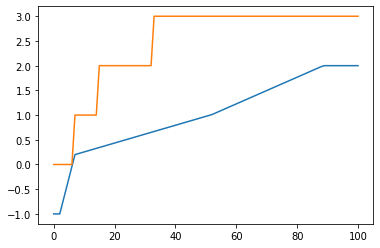

In [231]:
nP = 3
leaf_pop_emerged = [ceil((i)*nP) if 0< i < 1 else nP if 0 < i else 0 for i in dvi]
plt.plot(dvi)
plt.plot(leaf_pop_emerged)

In [234]:
nP = 1
plt.figure(figsize=(24,12))
print(nP)
assert Astart - 0.65 < 0.001

t_lma_flag = 2 - Astart
t_lem_flag = 0.2 # t_lma_flag * 1.8/3.5 # TODO: How do we find the length of emergence for flag leaf?
t_l_flag = t_lma_flag + t_lem_flag
print(t_lma_flag, t_lem_flag, t_l_flag)

t_lma_flag, t_lem_flag, t_l_flag

last_t_emerg = Astart - t_lem_flag
print(f"last_t_emerg: {last_t_emerg}")

first_t_emerg = 0
growth_rate = (nP-1) / (last_t_emerg - first_t_emerg)

emerged_leaf_count = np.ceil(dvi * growth_rate)

# Emergence dates (function of DVI)
leaf_population_t_emerg = np.array( [d for (i, c), d in zip(enumerate(emerged_leaf_count), dvi) if c >= 0 and c > emerged_leaf_count[i-1] and c <= nP])
print(leaf_population_t_emerg)
assert len(leaf_population_t_emerg) == nP
# assert leaf_population_t_emerg[0] == next(d for d in dvi if -0.1 < d < 0.1)
# assert isclose(leaf_population_t_emerg[-1],last_t_emerg, abs_tol=1e-1)

t_lem = t_lem_flag # TODO: How do we define flag leaf length
# Emergence to fully grown (function of DVI)
leaf_population_t_lems = [t_lem for _ in range(nP-1)] + [t_lem_flag]
print(leaf_population_t_lems)


growing_populations_all = [get_growing_populations(nP, d, leaf_population_t_emerg, leaf_population_t_lems) for d in dvi]


# x = (dd_full + sowing_day).tolist() + [0]

# for iP in range(nP):
#     b = np.array([g[iP] for g in growing_populations_all])
#     plt.fill_between(x, iP+0.2, iP+0.2 + (b*0.5), label=iP)
#     plt.legend()
    
    
for iP in range(nP-1):
    vert_line(plt, leaf_population_t_emerg[iP], [iP, iP+1], c="green")
    vert_line(plt, leaf_population_t_emerg[iP] + leaf_population_t_lems[iP], [iP, iP+1], c="orange")
    vert_line(plt, leaf_population_t_emerg[iP] + t_l_flag, [iP, iP+1], c="red")

vert_line(plt, leaf_population_t_emerg[nP-1], [nP-1, nP-1+1], c="green")
vert_line(plt, leaf_population_t_emerg[nP-1] + leaf_population_t_lems[nP-1], [nP-1, nP-1+1], c="orange")
vert_line(plt, leaf_population_t_emerg[nP-1] + t_l_flag, [nP-1, nP-1+1], c="red")



# plt.ylim((-0.99,2.01))
plt.scatter(dvi, emerged_leaf_count)
plt.show()


1
1.3499999999999999 0.2 1.5499999999999998
last_t_emerg: 0.4500000000000001
[]


AssertionError: 

<Figure size 1728x864 with 0 Axes>